In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
 
#Import IMDB dataset:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)
 
#Pad sequences:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = models.Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

history = model.fit(input_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.5777 - loss: 0.6676 - val_accuracy: 0.7556 - val_loss: 0.5128
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.7934 - loss: 0.4684 - val_accuracy: 0.8016 - val_loss: 0.4376
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8503 - loss: 0.3606 - val_accuracy: 0.8304 - val_loss: 0.3901
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.8753 - loss: 0.3083 - val_accuracy: 0.8526 - val_loss: 0.3627
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9016 - loss: 0.2510 - val_accuracy: 0.8140 - val_loss: 0.4252
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9260 - loss: 0.2022 - val_accuracy: 0.8514 - val_loss: 0.3993
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9510 - loss: 0.1429 - val_accuracy: 0.8486 - val_loss: 0.4514
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.9622 - loss: 0.1156 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


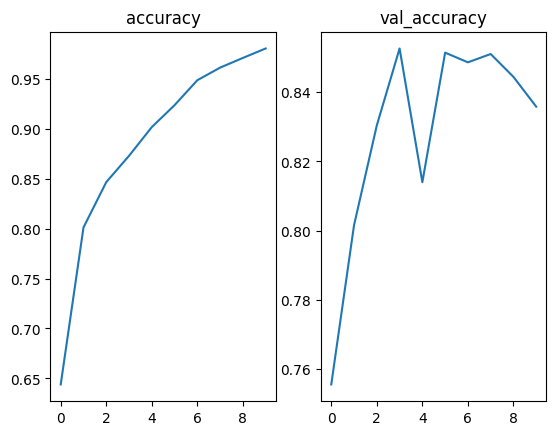

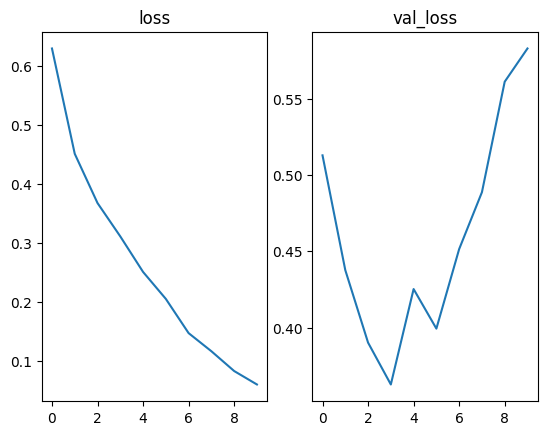

In [17]:
from matplotlib import pyplot as plt

history_dict = history.history
print(history_dict.keys())

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history_dict['val_accuracy'])
ax[1].set_title('val_accuracy')
plt.show()

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['loss'])
ax[0].set_title('loss')
ax[1].plot(history_dict['val_loss'])
ax[1].set_title('val_loss')
plt.show()


## LSTM

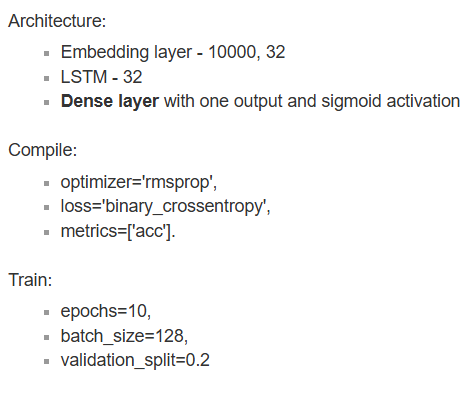

In [10]:
from tensorflow.keras.layers import LSTM

model2 = models.Sequential()
model2.add(Embedding(10000, 32))
model2.add(LSTM(32, dropout=0.5))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(optimizer="rmsprop",
                loss='binary_crossentropy',
                metrics=['accuracy'])

model2.summary()

history2 = model2.fit(input_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 186ms/step - accuracy: 0.5759 - loss: 0.6663 - val_accuracy: 0.8042 - val_loss: 0.4603
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 180ms/step - accuracy: 0.8157 - loss: 0.4190 - val_accuracy: 0.8412 - val_loss: 0.3885
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 181ms/step - accuracy: 0.8580 - loss: 0.3427 - val_accuracy: 0.7488 - val_loss: 0.5423
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 188ms/step - accuracy: 0.8766 - loss: 0.3090 - val_accuracy: 0.8560 - val_loss: 0.4185
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 190ms/step - accuracy: 0.8879 - loss: 0.2840 - val_accuracy: 0.8724 - val_loss: 0.3142
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 188ms/step - accuracy: 0.9008 - loss: 0.2535 - val_accuracy: 0.8836 - val_loss: 0.2882
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 185ms/step - accuracy: 0.9125 - loss: 0.2355 - val_accuracy: 0.8406 - val_loss: 0.4783
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 188ms/step - accuracy: 0.9082 - loss: 0

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


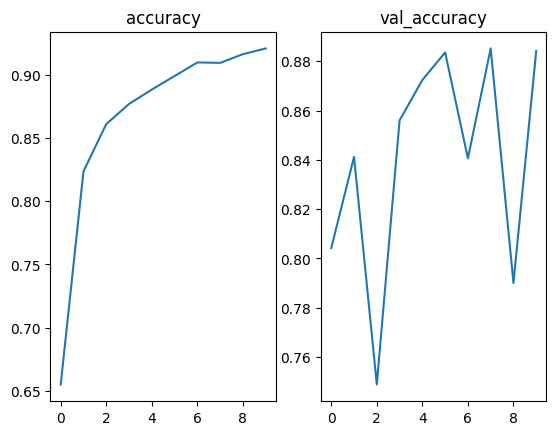

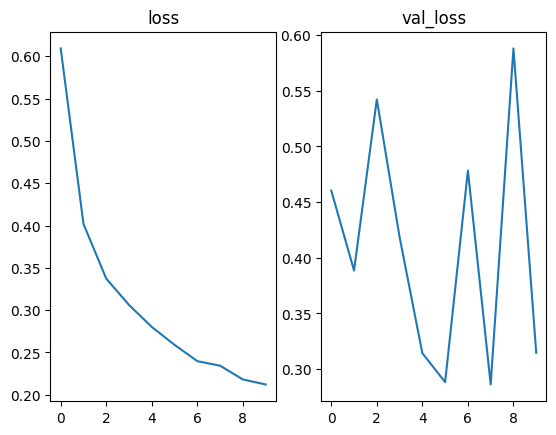

In [18]:
history_dict = history2.history
print(history_dict.keys())

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history_dict['val_accuracy'])
ax[1].set_title('val_accuracy')
plt.show()

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['loss'])
ax[0].set_title('loss')
ax[1].plot(history_dict['val_loss'])
ax[1].set_title('val_loss')
plt.show()


In [13]:
model_3 = models.Sequential()
model_3.add(Embedding(10000, 32))
model_3.add(LSTM(32, dropout=0.5, return_sequences=True))
model_3.add(LSTM(32, dropout=0.5, return_sequences=True))
model_3.add(LSTM(32, dropout=0.5, return_sequences=False))
model_3.add(Dense(1, activation="sigmoid"))

model_3.compile(optimizer="rmsprop",
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_3.summary()

history3 = model_3.fit(input_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 95s 576ms/step - accuracy: 0.5075 - loss: 0.6909 - val_accuracy: 0.6896 - val_loss: 0.5846
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 574ms/step - accuracy: 0.7437 - loss: 0.5340 - val_accuracy: 0.8422 - val_loss: 0.3956
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 89s 569ms/step - accuracy: 0.8335 - loss: 0.4036 - val_accuracy: 0.8698 - val_loss: 0.3238
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 93s 592ms/step - accuracy: 0.8657 - loss: 0.3468 - val_accuracy: 0.8376 - val_loss: 0.3965
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 88s 564ms/step - accuracy: 0.8754 - loss: 0.3127 - val_accuracy: 0.8784 - val_loss: 0.2970
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 89s 565ms/step - accuracy: 0.8892 - loss: 0.2965 - val_accuracy: 0.8748 - val_loss: 0.3056
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 89s 567ms/step - accuracy: 0.8995 - loss: 0.2600 - val_accuracy: 0.8838 - val_loss: 0.3004
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 572ms/step - accuracy: 0.9051 - loss: 0

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


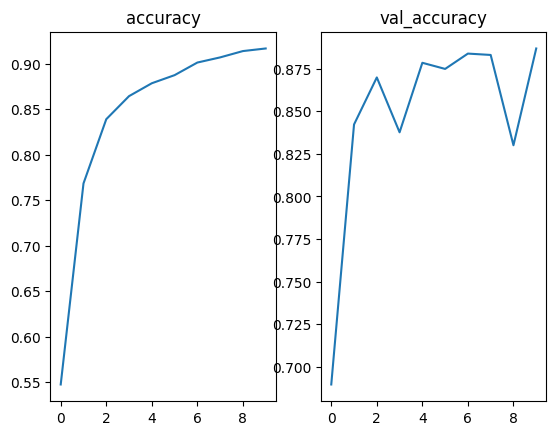

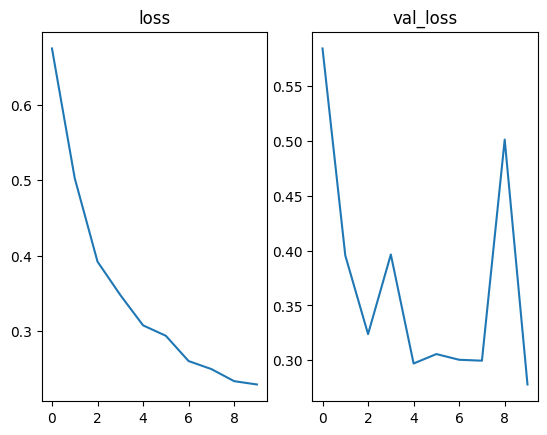

In [16]:
history_dict = history3.history
print(history_dict.keys())

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history_dict['val_accuracy'])
ax[1].set_title('val_accuracy')
plt.show()

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['loss'])
ax[0].set_title('loss')
ax[1].plot(history_dict['val_loss'])
ax[1].set_title('val_loss')
plt.show()
